In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost
import lightgbm
import tsfresh
import glob

In [2]:
file_pattern_idle = 'homework_5/data/idle/*.csv'
file_pattern_running = 'homework_5/data/running/*.csv' 
file_pattern_stairs = 'homework_5/data/stairs/*.csv' 
file_pattern_walking = 'homework_5/data/walking/*.csv' 

In [3]:
files_idle = glob.glob(file_pattern_idle)
files_running = glob.glob(file_pattern_running)
files_stairs = glob.glob(file_pattern_stairs)
files_walking = glob.glob(file_pattern_walking)

In [4]:
df_idle = pd.DataFrame()
df_running = pd.DataFrame()
df_stairs = pd.DataFrame()
df_walking = pd.DataFrame()

# Збереження данних в один файл.

In [7]:
id_f = 0
for file in files_idle:
    data = pd.read_csv(file)
    data['id_name'] = 1
    data['id_file'] = id_f
    id_f += 1
    df_idle = pd.concat([df_idle, data]).reset_index(drop=True)
        
df_idle.to_csv('homework_5/data_preprocesing/df_idle.csv', index=False)

id_f = 0
for file in files_running:
    data = pd.read_csv(file)
    data['id_name'] = 2
    data['id_file'] = id_f
    id_f += 1
    df_running = pd.concat([df_running, data]).reset_index(drop=True)
        
df_running.to_csv('homework_5/data_preprocesing/df_running.csv', index=False)

id_f = 0
for file in files_stairs:
    data = pd.read_csv(file)
    data['id_name'] = 3
    data['id_file'] = id_f
    id_f += 1
    df_stairs = pd.concat([df_stairs, data]).reset_index(drop=True)
        
df_stairs.to_csv('homework_5/data_preprocesing/df_stairs.csv', index=False)

id_f = 0
for file in files_walking:
    data = pd.read_csv(file)
    data['id_name'] = 4
    data['id_file'] = id_f
    id_f += 1
    df_walking = pd.concat([df_walking, data]).reset_index(drop=True)
        
df_walking.to_csv('homework_5/data_preprocesing/df_walking.csv', index=False)

In [5]:
df_idle = pd.read_csv('homework_5/data_preprocesing/df_idle.csv')
df_running = pd.read_csv('homework_5/data_preprocesing/df_running.csv')
df_stairs = pd.read_csv('homework_5/data_preprocesing/df_stairs.csv')
df_walking = pd.read_csv('homework_5/data_preprocesing/df_walking.csv')

In [6]:
df = pd.concat([df_idle, df_running, df_stairs, df_walking]).reset_index(drop=True)
df.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,id_name,id_file
0,0.258574,-0.033519,9.763555,1,2
1,0.234632,0.019154,9.763555,1,2
2,0.253785,-0.009577,9.758766,1,2
3,0.258574,-0.009577,9.763555,1,2
4,0.229843,-0.019154,9.758766,1,2


# 

In [7]:
X = df.drop('id_name', axis=1)
X = X.drop('id_file', axis=1)
X

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,0.258574,-0.033519,9.763555
1,0.234632,0.019154,9.763555
2,0.253785,-0.009577,9.758766
3,0.258574,-0.009577,9.763555
4,0.229843,-0.019154,9.758766
...,...,...,...
581575,5.391742,-13.579912,-4.611232
581576,-1.810016,-8.954314,-5.597643
581577,3.533842,-10.338163,-6.469133
581578,-2.413355,-1.862689,4.917691


In [8]:
y = df['id_name']
y

0         1
1         1
2         1
3         1
4         1
         ..
581575    4
581576    4
581577    4
581578    4
581579    4
Name: id_name, Length: 581580, dtype: int64

In [9]:
X.shape

(581580, 3)

In [10]:
y.shape

(581580,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [13]:
X_train.count()

accelerometer_X    465264
accelerometer_Y    465264
accelerometer_Z    465264
dtype: int64

In [14]:
X_test.count()

accelerometer_X    116316
accelerometer_Y    116316
accelerometer_Z    116316
dtype: int64

In [15]:
y_train.count()

465264

In [16]:
y_test.count()

116316

/home/user/.cache/pypoetry/virtualenvs/ds-jupyter-hw-uN8zZLdU-py3.9/lib64/python3.9/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


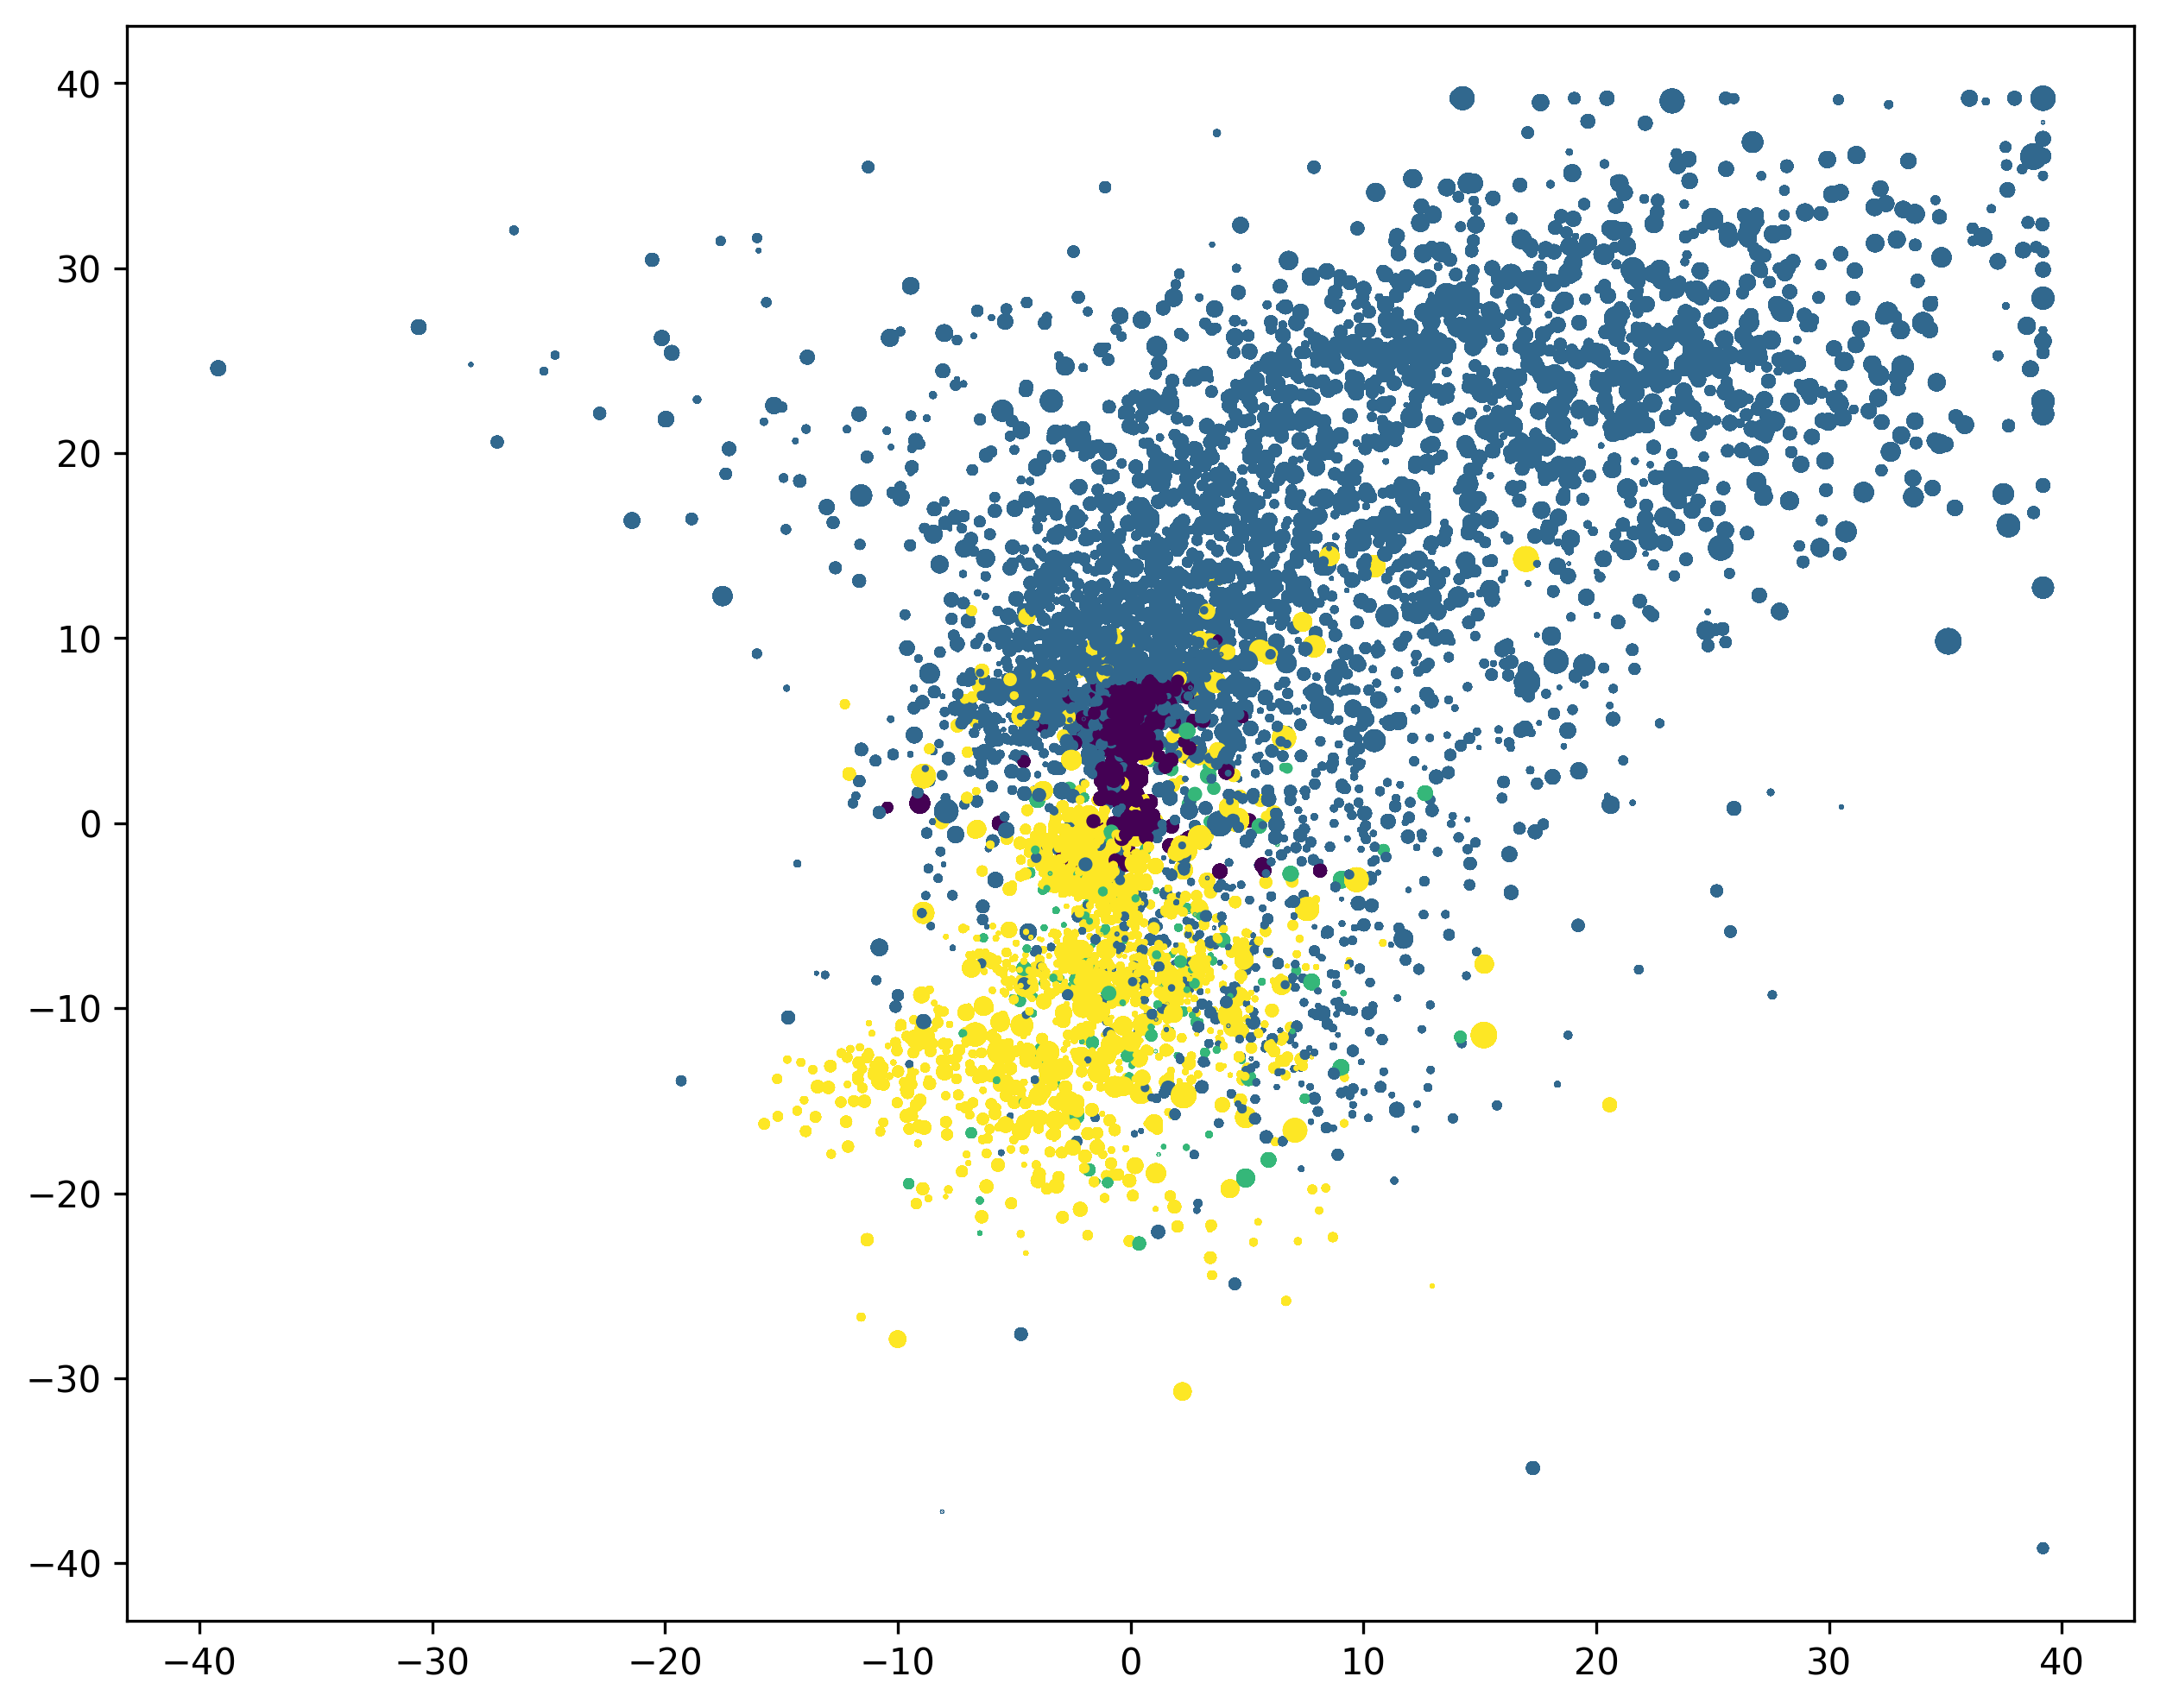

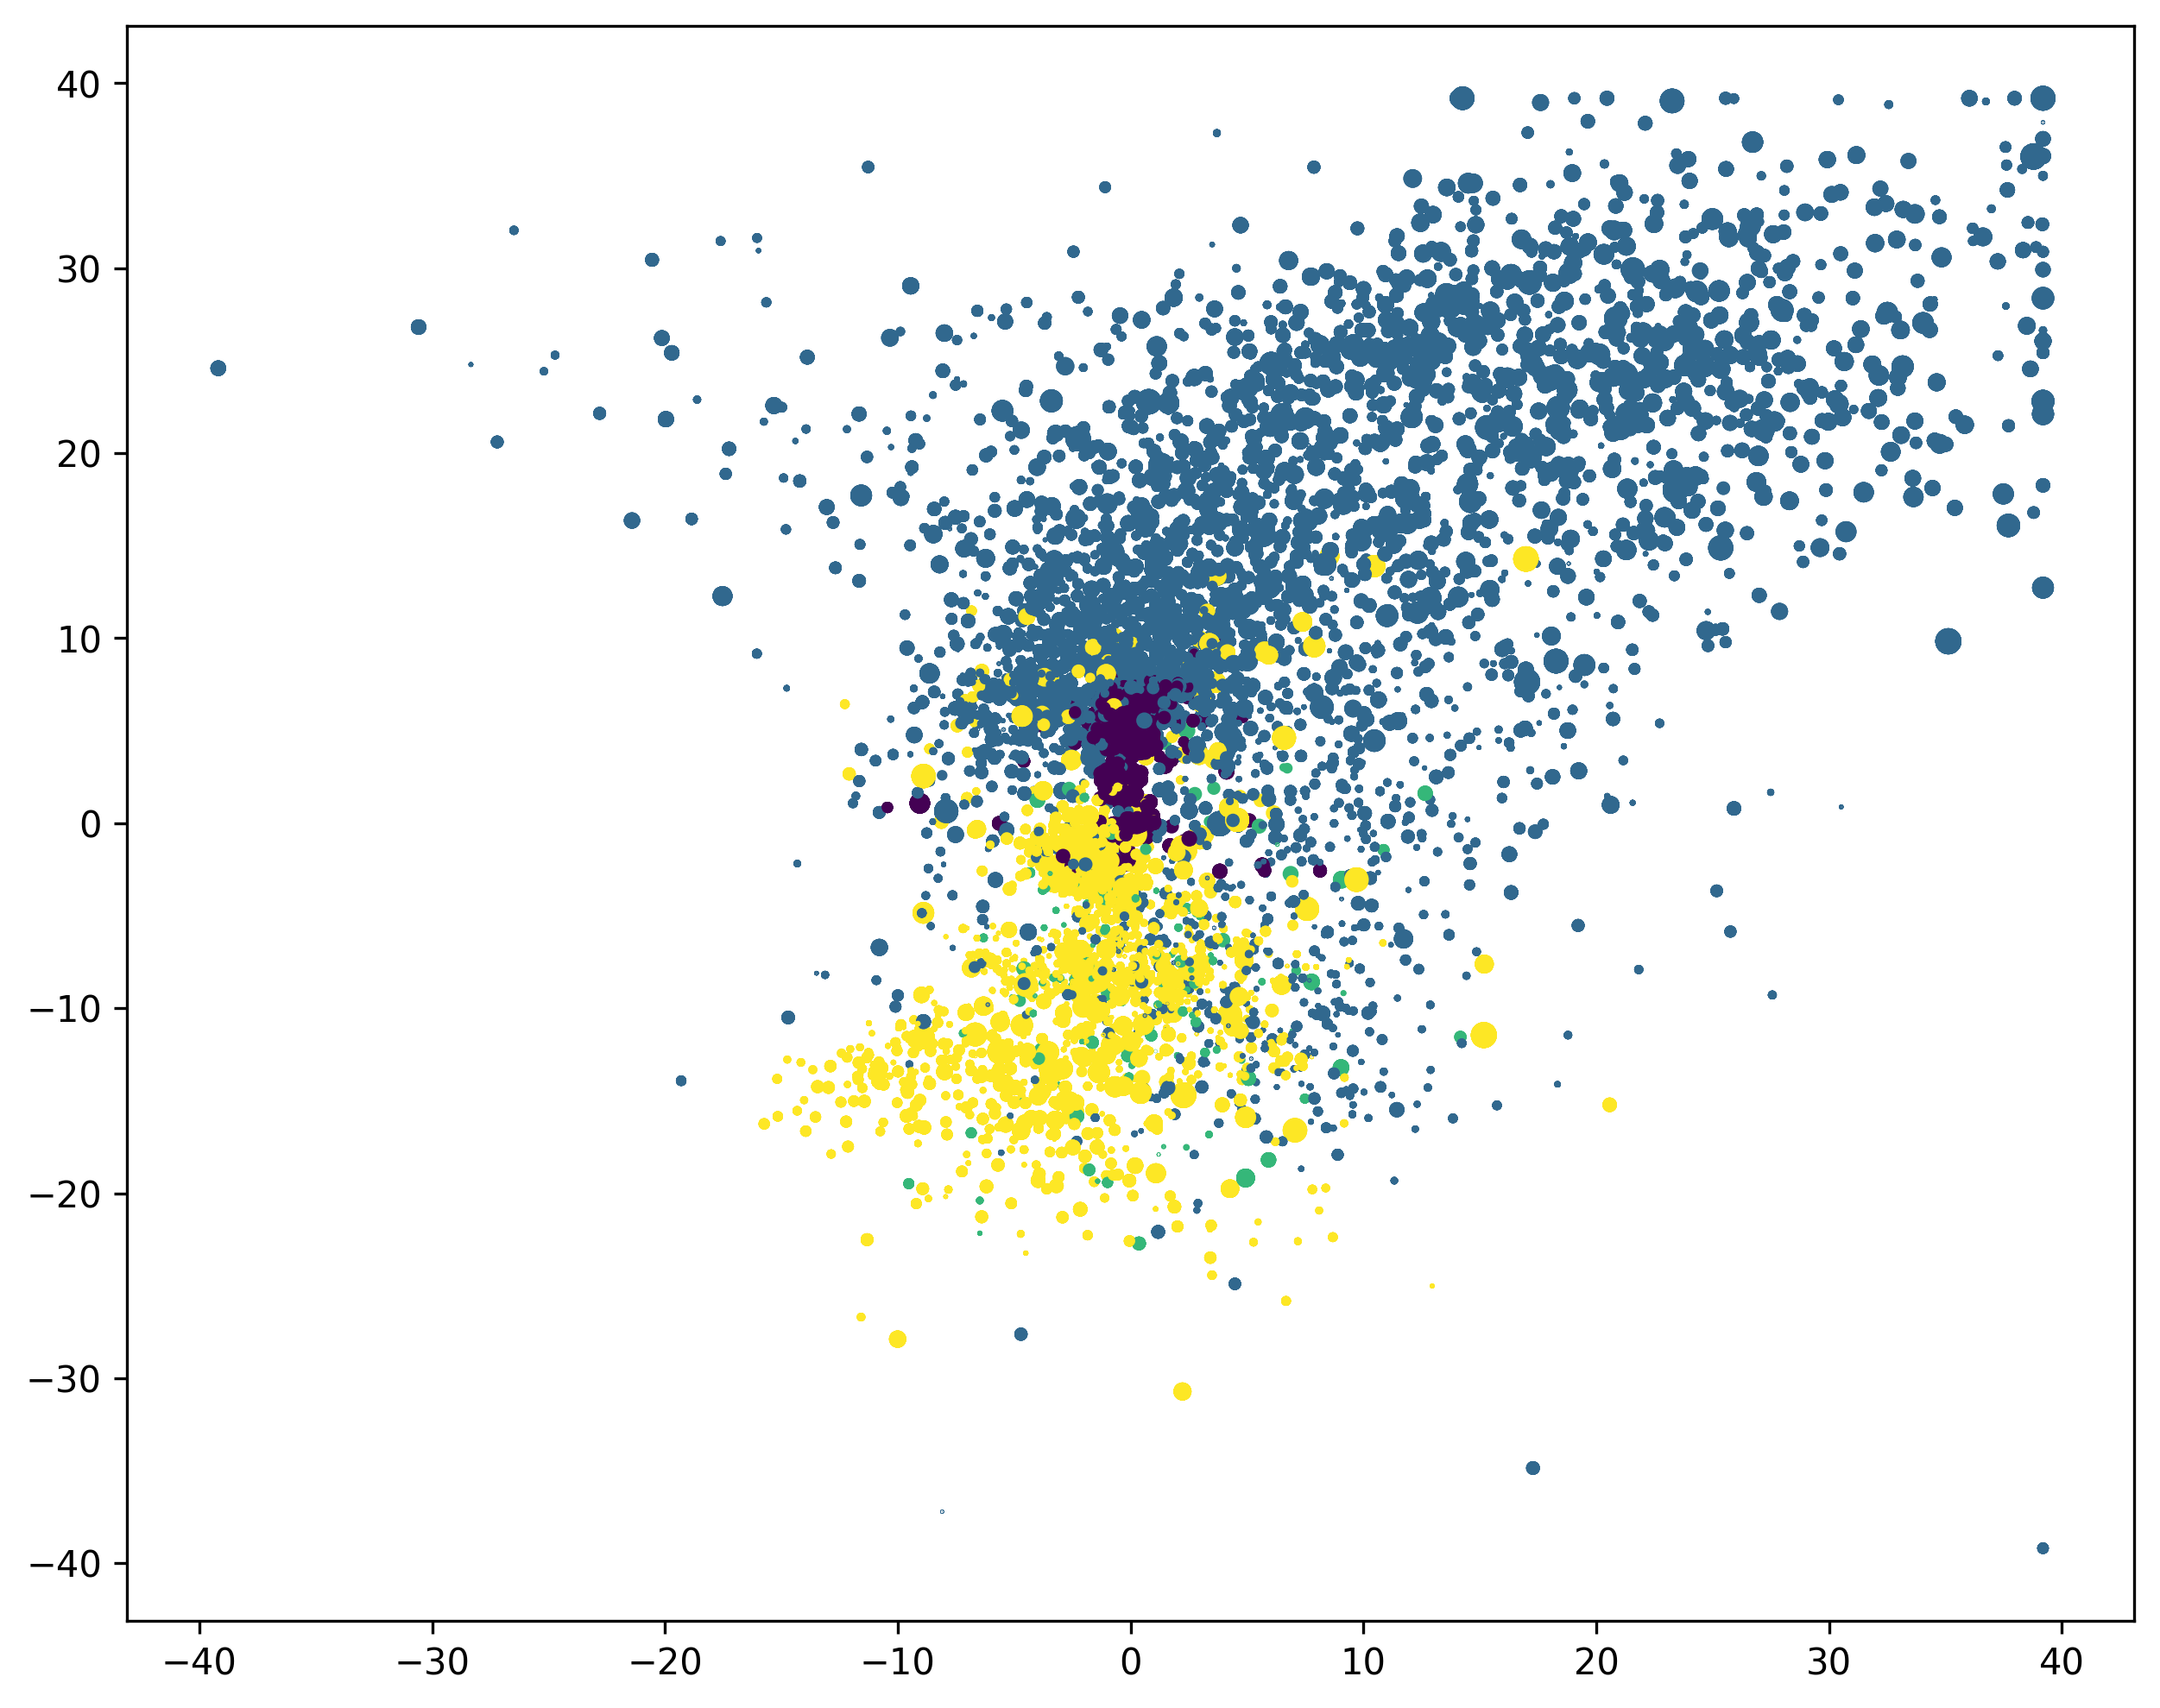

In [17]:
# Графік для X_train
fig1, ax1 = plt.subplots(figsize=(10, 8), dpi=300)
ax1.scatter(X_train['accelerometer_X'], X_train['accelerometer_Y'], X_train['accelerometer_Z'], c=y_train)
plt.show()

# Графік для X_test
fig2, ax2 = plt.subplots(figsize=(10, 8), dpi=300)
ax2.scatter(X_test['accelerometer_X'], X_test['accelerometer_Y'], X_test['accelerometer_Z'], c=y_test)
plt.show()

In [19]:
# model = DecisionTreeClassifier(max_depth=10)
model = RandomForestClassifier(n_estimators=3)
# model = xgboost.XGBClassifier(n_estimators=10)
# model = lightgbm.LGBMClassifier(n_estimators=8, num_leaves=16)
svm_model = SVC()

In [20]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3)

In [21]:
svm_model.fit(X_train, y_train)

SVC()

In [20]:
print("RFC model feature importances" + model.feature_importances_)

array([0.31476296, 0.43878301, 0.24645404])

In [21]:
print('f1_score RFC model')
print(f1_score(y_train, model.predict(X_train), average='micro'), f1_score(y_test, model.predict(X_test), average='micro'))

(0.9999957013652464, 0.9999914027304928)

In [23]:
print('f1_score SVM model')
f1_score(y_train, svm_model.predict(X_train), average='micro'), f1_score(y_test, svm_model.predict(X_test), average='micro')

f1_score SVM model


(0.8953776780494515, 0.8965404587503009)

In [25]:
svm_pred = svm_model.predict(X_test)
rf_pred = model.predict(X_test)

In [26]:
svm_report = classification_report(y_test, svm_pred)
print(svm_report)

rf_report = classification_report(y_test, rf_pred)
print(rf_report)

              precision    recall  f1-score   support

           1       0.96      0.99      0.97     18702
           2       0.93      0.91      0.92     61344
           3       1.00      0.01      0.01      2970
           4       0.80      0.91      0.85     33300

    accuracy                           0.90    116316
   macro avg       0.93      0.70      0.69    116316
weighted avg       0.90      0.90      0.89    116316

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     18702
           2       1.00      1.00      1.00     61344
           3       1.00      1.00      1.00      2970
           4       1.00      1.00      1.00     33300

    accuracy                           1.00    116316
   macro avg       1.00      1.00      1.00    116316
weighted avg       1.00      1.00      1.00    116316



### Висновок: 
    1. SVM модель:
       - Для класів 1, 2 та 4 досягнуті високі показники точності, відновлення та F1, що свідчить про добру здатність моделі розпізнавати ці класи.
       - Для класу 3 досягнутий низький показник F1 (0.01), що означає, що модель майже не розпізнає цей клас.
       - Загальна точність моделі (accuracy) складає 0.90, що свідчить про те, що модель правильно класифікує приблизно 90% випадків.

    2. Random Forest модель:
       - Для всіх класів досягнуті ідеальні показники точності, відновлення та F1 (1.00), що свідчить про високу здатність моделі розпізнавати всі класи.
       - Загальна точність моделі (accuracy) також складає 1.00, що означає, що модель правильно класифікує всі випадки.

    У порівнянні двох моделей:
    - Random Forest модель показує кращі результати, демонструючи ідеальну точність, відновлення та F1 для всіх класів.
    - SVM модель має нижчі показники для класу 3 і меншу загальну точність, але все ще показує добрі результати для інших класів.
    

In [22]:
h = 15
x_min, x_max = X['accelerometer_X'].min() - 1, X['accelerometer_X'].max() + 1
y_min, y_max = X['accelerometer_Y'].min() - 1, X['accelerometer_Y'].max() + 1
z_min, z_max = X['accelerometer_Z'].min() - 1, X['accelerometer_Z'].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h), np.arange(z_min, z_max, h))

/home/user/.cache/pypoetry/virtualenvs/ds-jupyter-hw-uN8zZLdU-py3.9/lib64/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


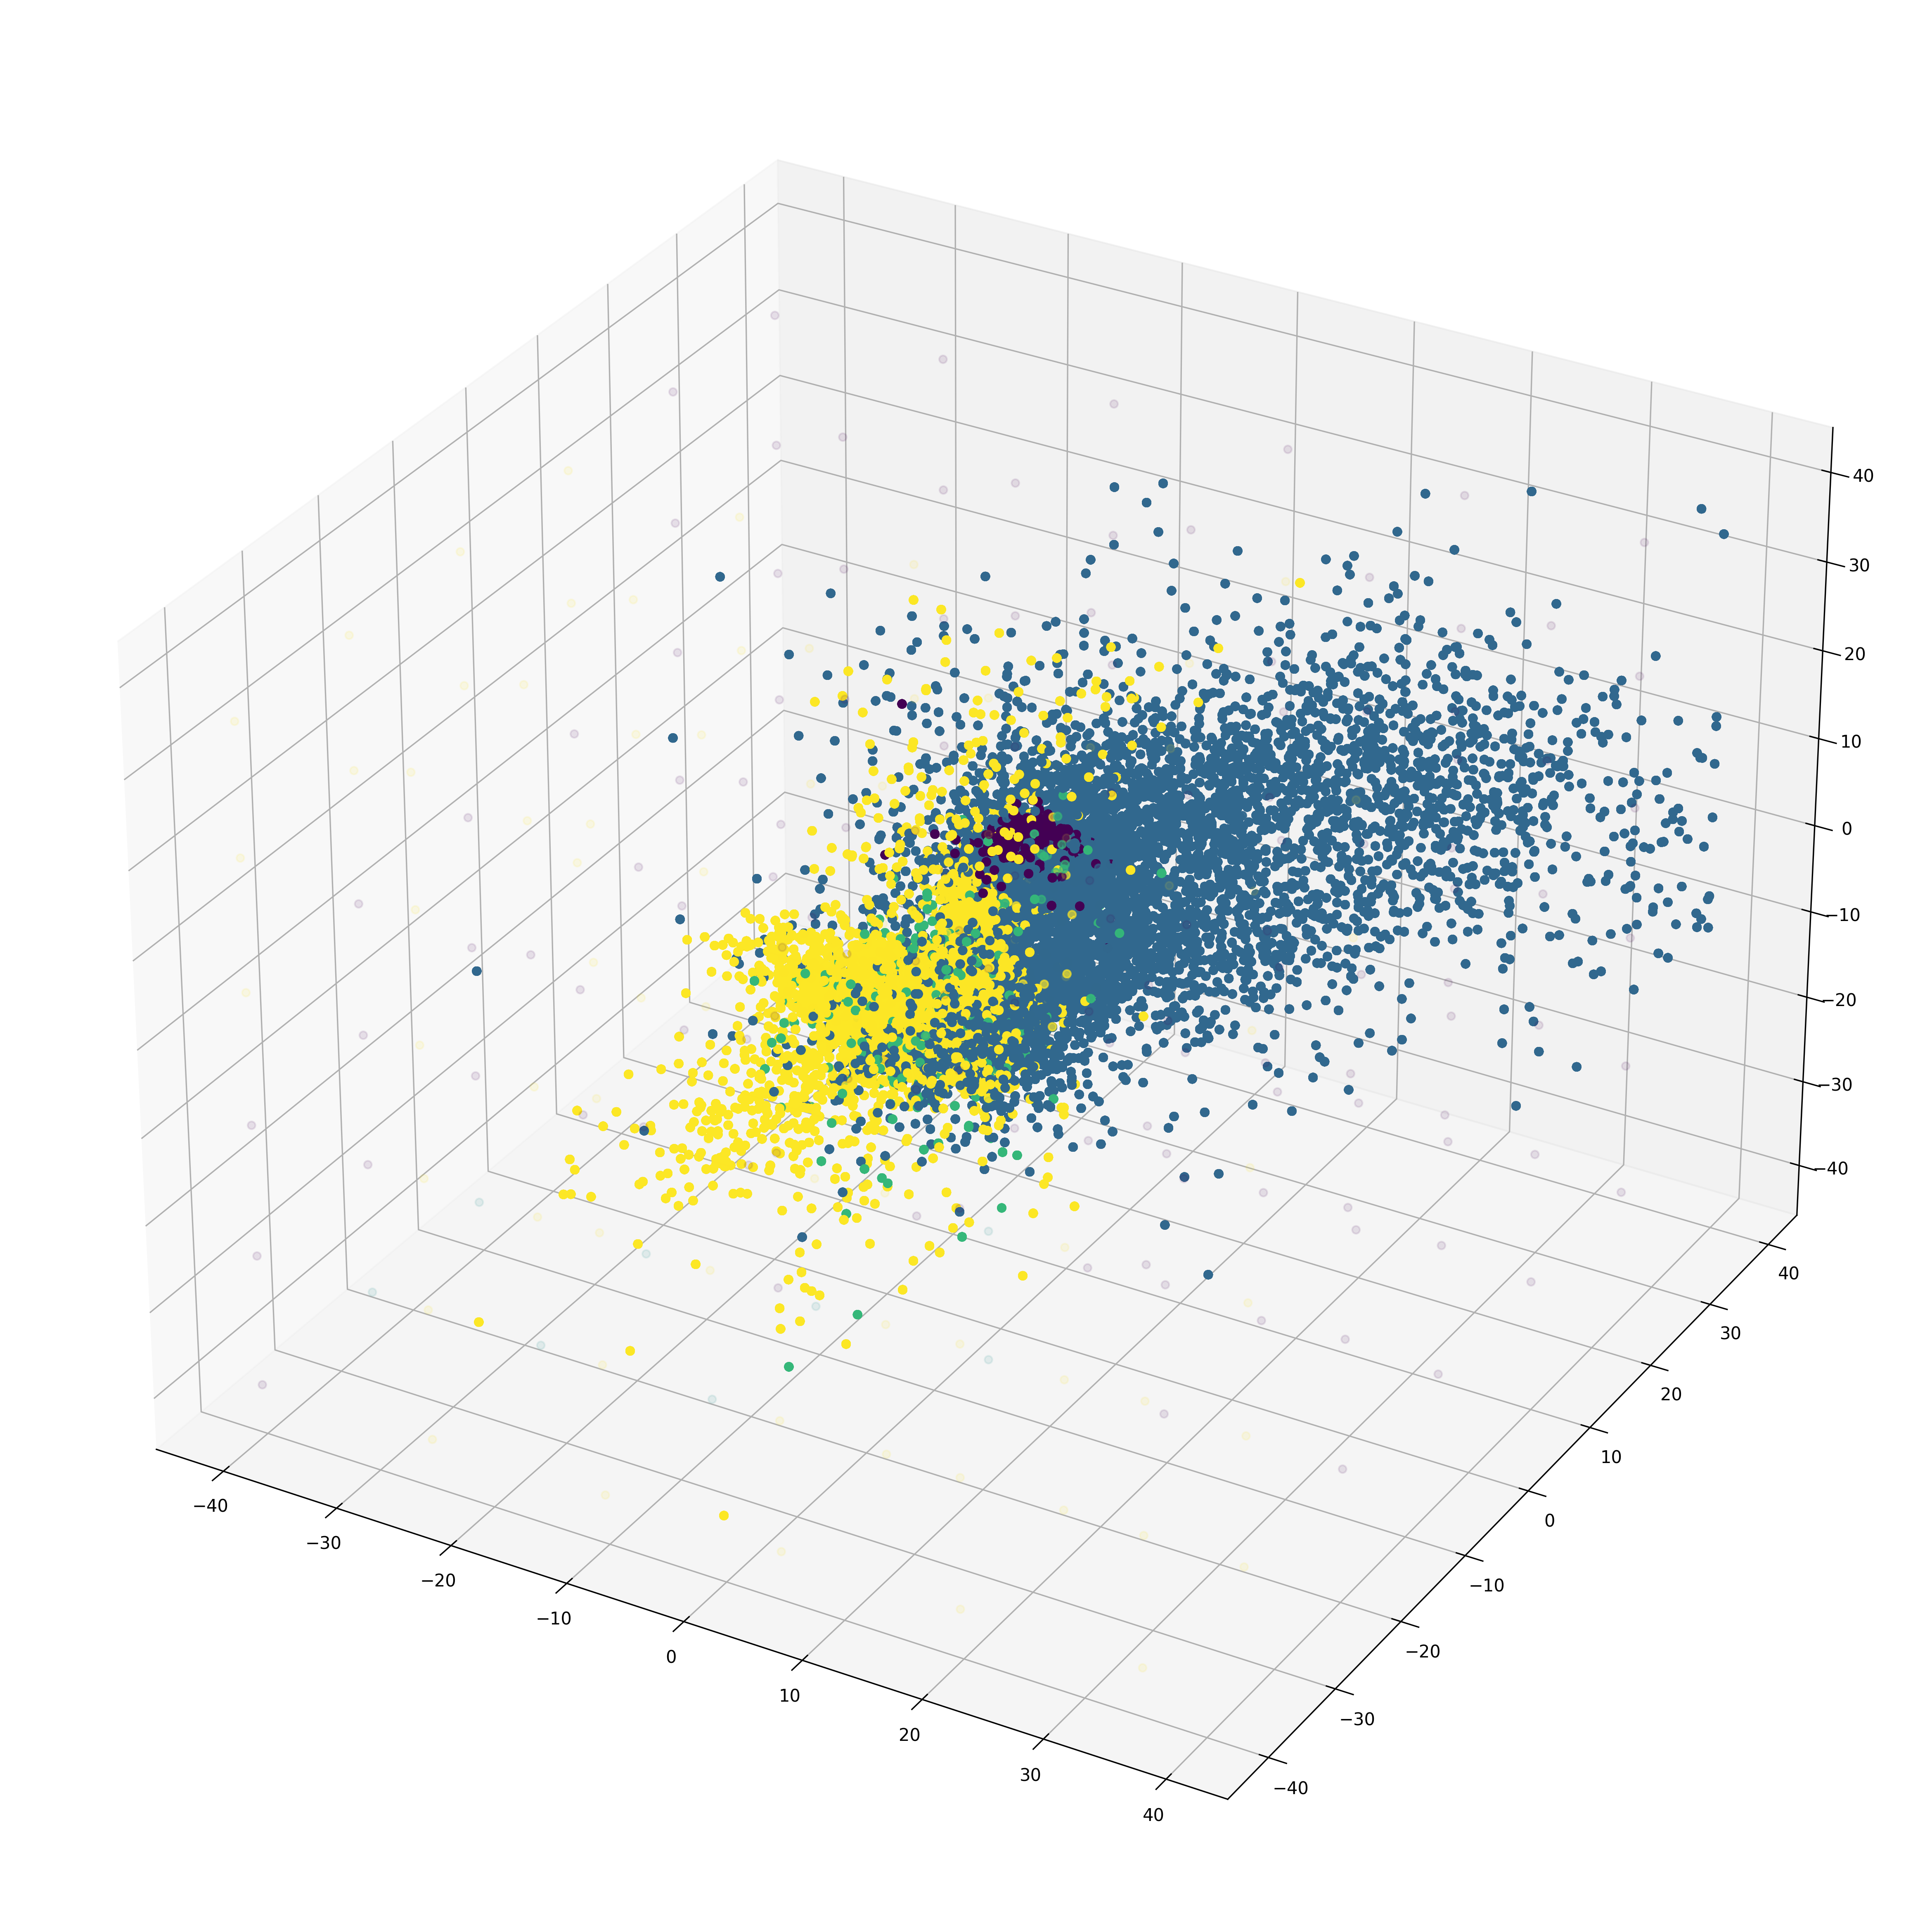

In [23]:
for clf in [model]:
    h = clf.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
    h = h.reshape(xx.shape)

    fig = plt.figure(figsize=(20, 20), dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter3D(xx.ravel(), yy.ravel(), zz.ravel(), c=h, alpha=0.1)
    ax.scatter3D(X_train['accelerometer_X'], X_train['accelerometer_Y'], X_train['accelerometer_Z'], c=y_train)
    ax.scatter3D(X_test['accelerometer_X'], X_test['accelerometer_Y'], X_test['accelerometer_Z'], c=y_test)

    plt.show()